# (a) Checkinh for ARCH/GARCH effects

In [1]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [15]:
# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox
import seaborn as sns

In [16]:
# Set plotting style
sns.set(style="whitegrid")

In [17]:
data = yf.download('ARVINDFASN.NS', start='2019-01-01', end='2024-07-25')

[*********************100%%**********************]  1 of 1 completed


In [18]:
print(data.head())
print(data.info())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-03-08  439.063080  460.980927  439.063080  460.980927  459.548645   
2019-03-11  484.013275  484.013275  484.013275  484.013275  482.509430   
2019-03-12  508.197205  508.197205  508.197205  508.197205  506.618225   
2019-03-13  533.607056  533.607056  533.607056  533.607056  531.949158   
2019-03-14  560.280029  560.280029  560.280029  560.280029  558.539246   

             Volume  
Date                 
2019-03-08    33388  
2019-03-11    12681  
2019-03-12     8760  
2019-03-13  1166129  
2019-03-14     6931  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1326 entries, 2019-03-08 to 2024-07-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1326 non-null   float64
 1   High       1326 non-null   float64
 2   Low        1326 non-null   float64
 3 

In [12]:
print(data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [19]:
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna()  # Convert to percentage returns

In [20]:
print("\nFitting ARCH Model...")
arch_model_fit = arch_model(returns, vol='ARCH', p=1).fit(disp='off')
print("ARCH Model Summary:")
print(arch_model_fit.summary())


Fitting ARCH Model...
ARCH Model Summary:
                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3243.70
Distribution:                  Normal   AIC:                           6493.41
Method:            Maximum Likelihood   BIC:                           6508.97
                                        No. Observations:                 1325
Date:                Fri, Jul 26 2024   Df Residuals:                     1324
Time:                        00:00:34   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0328  7.48

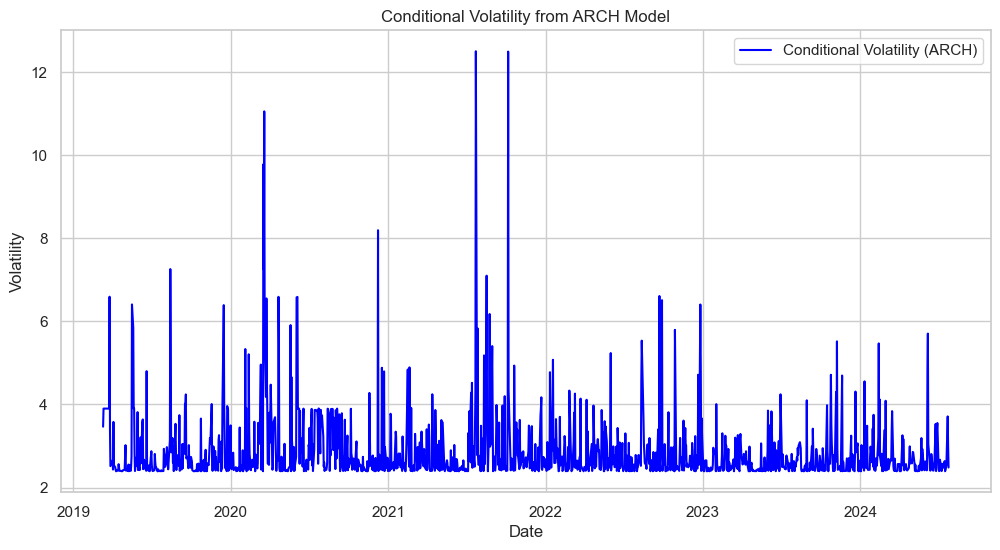

In [21]:
# Plot the conditional volatility from the ARCH model
plt.figure(figsize=(12, 6))
plt.plot(arch_model_fit.conditional_volatility, label='Conditional Volatility (ARCH)', color='blue')
plt.title('Conditional Volatility from ARCH Model')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
ljungbox_arch = acorr_ljungbox(arch_model_fit.resid, lags=[10])
print("\nLjung-Box Test for ARCH Model Residuals:")
print(ljungbox_arch)


Ljung-Box Test for ARCH Model Residuals:
      lb_stat  lb_pvalue
10  23.416786   0.009308


In [23]:
print("\nFitting GARCH Model...")
garch_model_fit = arch_model(returns, vol='Garch', p=1, q=1).fit(disp='off')
print("GARCH Model Summary:")
print(garch_model_fit.summary())


Fitting GARCH Model...
GARCH Model Summary:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3227.36
Distribution:                  Normal   AIC:                           6462.73
Method:            Maximum Likelihood   BIC:                           6483.49
                                        No. Observations:                 1325
Date:                Fri, Jul 26 2024   Df Residuals:                     1324
Time:                        00:01:29   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0381  7.

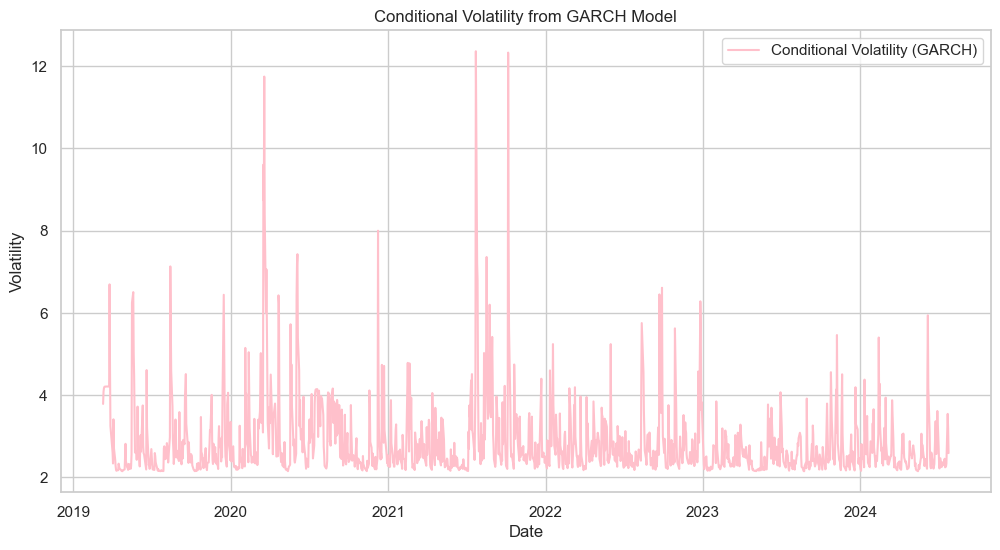

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(garch_model_fit.conditional_volatility, label='Conditional Volatility (GARCH)', color='pink')
plt.title('Conditional Volatility from GARCH Model')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
ljungbox_garch = acorr_ljungbox(garch_model_fit.resid, lags=[10])
print("\nLjung-Box Test for GARCH Model Residuals:")
print(ljungbox_garch)


Ljung-Box Test for GARCH Model Residuals:
      lb_stat  lb_pvalue
10  23.416786   0.009308


In [26]:
print("\nFitting GARCH Model with additional parameters...")
am = arch_model(returns, vol="Garch", p=1, q=1, dist="Normal")
res = am.fit(update_freq=5)


Fitting GARCH Model with additional parameters...
Iteration:      5,   Func. Count:     32,   Neg. LLF: 3227.4730505829516
Iteration:     10,   Func. Count:     57,   Neg. LLF: 3227.3648774180037
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3227.3648774180037
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10


In [27]:
forecast_mean = res.forecast().mean
forecast_residual_variance = res.forecast().residual_variance
forecast_variance = res.forecast().variance

print("\nForecast Mean (last 3 periods):")
print(forecast_mean.iloc[-3:])
print("Forecast Residual Variance (last 3 periods):")
print(forecast_residual_variance.iloc[-3:])
print("Forecast Variance (last 3 periods):")
print(forecast_variance.iloc[-3:])


Forecast Mean (last 3 periods):
                 h.1
Date                
2024-07-24 -0.038126
Forecast Residual Variance (last 3 periods):
                 h.1
Date                
2024-07-24  5.314931
Forecast Variance (last 3 periods):
                 h.1
Date                
2024-07-24  5.314931


In [30]:
print("\nForecasting 90 days ahead")
forecasts = res.forecast(horizon=90)
print("\n90-day Forecast Residual Variance (last 3 periods):")
print(forecasts.residual_variance.iloc[-3:])


Forecasting 90 days ahead

90-day Forecast Residual Variance (last 3 periods):
                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2024-07-24  5.314931  6.730244  7.671184  8.296747  8.712638  8.989134   

                h.07      h.08      h.09      h.10  ...      h.81      h.82  \
Date                                                ...                       
2024-07-24  9.172956  9.295166  9.376415  9.430431  ...  9.537575  9.537575   

                h.83      h.84      h.85      h.86      h.87      h.88  \
Date                                                                     
2024-07-24  9.537575  9.537575  9.537575  9.537575  9.537575  9.537575   

                h.89      h.90  
Date                            
2024-07-24  9.537575  9.537575  

[1 rows x 90 columns]


In [31]:
print("\nAnalysis Summary:")
print("1. ARCH and GARCH models were successfully fitted to the returns data.")
print("2. Conditional volatility was plotted for both ARCH and GARCH models.")
print("3. Residuals were checked for autocorrelation using the Ljung-Box test.")
print("4. Forecasts were generated for a 90-day horizon, including variance and residual variance.")



Analysis Summary:
1. ARCH and GARCH models were successfully fitted to the returns data.
2. Conditional volatility was plotted for both ARCH and GARCH models.
3. Residuals were checked for autocorrelation using the Ljung-Box test.
4. Forecasts were generated for a 90-day horizon, including variance and residual variance.


# (b) Fitting VAR and VECM for commodities

In [32]:
import os
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

In [33]:
# Load the dataset
df = pd.read_excel("C:\\Users\\Ferah Shan\\Downloads\\pinksheet.xlsx", sheet_name='Monthly Prices', skiprows=6)

In [34]:
# Rename the first column to "Date"
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

In [35]:
# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'].astype(str) + '01', format='%YM%m%d')
print(df.info())  # Check the structure of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           774 non-null    datetime64[ns]
 1   CRUDE_PETRO    774 non-null    float64       
 2   CRUDE_BRENT    774 non-null    float64       
 3   CRUDE_DUBAI    774 non-null    float64       
 4   CRUDE_WTI      774 non-null    object        
 5   COAL_AUS       774 non-null    object        
 6   COAL_SAFRICA   774 non-null    object        
 7   NGAS_US        774 non-null    float64       
 8   NGAS_EUR       774 non-null    float64       
 9   NGAS_JP        774 non-null    object        
 10  iNATGAS        774 non-null    object        
 11  COCOA          774 non-null    float64       
 12  COFFEE_ARABIC  774 non-null    float64       
 13  COFFEE_ROBUS   774 non-null    float64       
 14  TEA_AVG        774 non-null    float64       
 15  TEA_COLOMBO    774 non-

In [36]:
# Select specific columns (Date and selected commodities)
commodity = df[['Date', 'CRUDE_BRENT', 'SOYBEANS', 'GOLD', 'SILVER', 'SUGAR_US', 'WHEAT_US_HRW']]

In [37]:
# Clean column names (optional, as Pandas automatically handles column names well)
commodity.columns = commodity.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [38]:
print(commodity.info())  # Check the structure of the cleaned dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          774 non-null    datetime64[ns]
 1   crude_brent   774 non-null    float64       
 2   soybeans      774 non-null    float64       
 3   gold          774 non-null    float64       
 4   silver        774 non-null    float64       
 5   sugar_us      774 non-null    float64       
 6   wheat_us_hrw  774 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 42.5 KB
None


In [39]:
# Remove the Date column for analysis
commodity_data = commodity.drop(columns=['date'])

In [40]:
# Column names to test (if you want to specify particular columns)
columns_to_test = commodity_data.columns

In [41]:
# Initialize counters and lists for stationary and non-stationary columns
non_stationary_count = 0
stationary_columns = []
non_stationary_columns = []

In [42]:
# Loop through each column and perform the ADF test
for col in columns_to_test:
    adf_result = adfuller(commodity_data[col])
    p_value = adf_result[1]  # Extract p-value for the test
    print(f"\nADF test result for column: {col}\n")
    print(f"Test Statistic: {adf_result[0]}")
    print(f"P-value: {p_value}")
    print(f"Critical Values: {adf_result[4]}")


ADF test result for column: crude_brent

Test Statistic: -1.5078661910935425
P-value: 0.5296165197702358
Critical Values: {'1%': -3.439006442437876, '5%': -2.865360521688131, '10%': -2.5688044403756587}

ADF test result for column: soybeans

Test Statistic: -2.42314645274189
P-value: 0.13530977427790403
Critical Values: {'1%': -3.4388599939707056, '5%': -2.865295977855759, '10%': -2.5687700561872413}

ADF test result for column: gold

Test Statistic: 1.3430517021933006
P-value: 0.9968394353612382
Critical Values: {'1%': -3.4389608473398194, '5%': -2.8653404270188476, '10%': -2.568793735369693}

ADF test result for column: silver

Test Statistic: -1.3972947107462221
P-value: 0.5835723787985763
Critical Values: {'1%': -3.438915730045254, '5%': -2.8653205426302253, '10%': -2.5687831424305845}

ADF test result for column: sugar_us

Test Statistic: -2.276775914396525
P-value: 0.17956762453055886
Critical Values: {'1%': -3.4389608473398194, '5%': -2.8653404270188476, '10%': -2.5687937353696

In [43]:
# Check if the p-value is greater than 0.05 (commonly used threshold)
if p_value > 0.05:
        non_stationary_count += 1
        non_stationary_columns.append(col)
else:
        stationary_columns.append(col)

In [45]:
# Print the number of non-stationary columns and the lists of stationary and non-stationary columns
print(f"\nNumber of non-stationary columns: {non_stationary_count}\n")
print(f"Non-stationary columns: {non_stationary_columns}\n")
print(f"Stationary columns: {stationary_columns}\n")


Number of non-stationary columns: 1

Non-stationary columns: ['wheat_us_hrw']

Stationary columns: []



In [46]:
# Co-Integration Test (Johansen's Test)
# Perform Johansen's Co-Integration Test
johansen_test = coint_johansen(commodity_data, det_order=0, k_ar_diff=1)

# Summary of the Co-Integration Test
print("\nJohansen Test Results:\n")
print(f"Eigenvalues:\n{johansen_test.eig}\n")
print(f"Trace Statistic:\n{johansen_test.lr1}\n")
print(f"Critical Values (5% level):\n{johansen_test.cvt[:, 1]}\n")


Johansen Test Results:

Eigenvalues:
[0.11398578 0.06876906 0.04867237 0.02710411 0.01899217 0.00405351]

Trace Statistic:
[226.10476071 132.67556204  77.67212223  39.15182203  17.93864778
   3.13567067]

Critical Values (5% level):
[95.7542 69.8189 47.8545 29.7961 15.4943  3.8415]



Det. terms outside the coint. relation & lagged endog. parameters for equation crude_brent
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0807      0.178     -0.454      0.650      -0.429       0.268
L1.crude_brent      0.3217      0.035      9.078      0.000       0.252       0.391
L1.soybeans         0.0127      0.007      1.768      0.077      -0.001       0.027
L1.gold            -0.0032      0.006     -0.523      0.601      -0.015       0.009
L1.silver          -0.0971      0.148     -0.655      0.512      -0.387       0.193
L1.sugar_us        -2.5861      4.026     -0.642      0.521     -10.477       5.305
L1.wheat_us_hrw     0.0107      0.011      0.966      0.334      -0.011       0.032
Det. terms outside the coint. relation & lagged endog. parameters for equation soybeans
                      coef    std err          z      P>|z|      

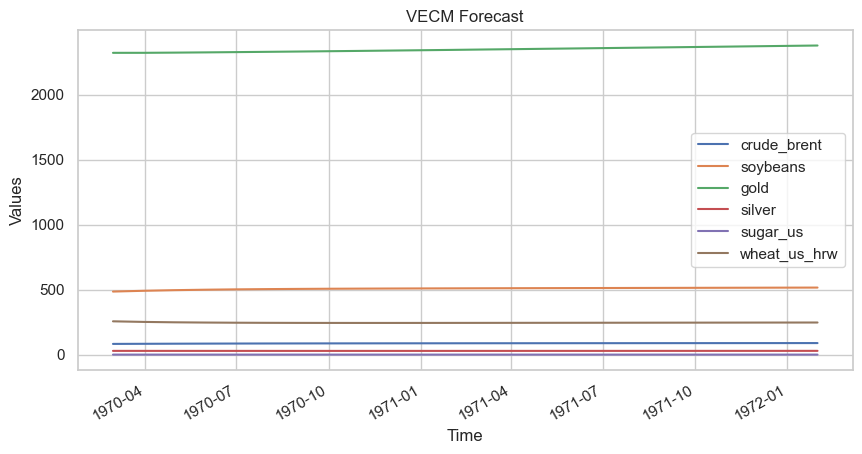

In [47]:
# Determine the number of co-integrating relationships (r) based on the test
r = 2  # Replace with the actual number from the test results

if r > 0:
    # If co-integration exists, estimate the VECM model
    vecm_model = VECM(commodity_data, k_ar_diff=1, coint_rank=r, deterministic='co')
    vecm_fitted = vecm_model.fit()

    # Summary of the VECM model
    print(vecm_fitted.summary())

    # Extracting coefficients from the VECM model
    print("Alpha Coefficients:\n", vecm_fitted.alpha)
    print("Beta Coefficients:\n", vecm_fitted.beta)
    print("Gamma Coefficients:\n", vecm_fitted.gamma)

    # Forecasting using the VECM model
    forecast = vecm_fitted.predict(steps=24)

    # Convert forecast to a DataFrame for plotting
    forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=commodity_data.index[-1], periods=25, freq='M')[1:], columns=commodity_data.columns)

    # Plotting the forecast
    forecast_df.plot(figsize=(10, 5))
    plt.title('VECM Forecast')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.show()

else:
    # If no co-integration exists, proceed with Unrestricted VAR Analysis
    var_model = VAR(commodity_data)
    var_fitted = var_model.fit(maxlags=10, ic='aic')

    # Summary of the VAR model
    print(var_fitted.summary())

    # Granger causality test
    for col in commodity_data.columns:
        granger_result = var_fitted.test_causality(causing=col, caused=[c for c in commodity_data.columns if c != col])
        print(f"Granger causality test for {col}:\n", granger_result.summary())

    # Forecasting using the VAR model
    var_forecast = var_fitted.forecast(var_fitted.y, steps=24)
    var_forecast_df = pd.DataFrame(var_forecast, index=pd.date_range(start=commodity_data.index[-1], periods=25, freq='M')[1:], columns=commodity_data.columns)

    # Plotting the forecast
    var_forecast_df.plot(figsize=(10, 5))
    plt.title('VAR Forecast')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.show()

In [48]:
# Check all available attributes
print(dir(vecm_fitted))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_chol_sigma_u', '_cov_sigma', '_delta_x', '_delta_y_1_T', '_make_conf_int', '_y_lag1', 'alpha', 'beta', 'coint_rank', 'conf_int_alpha', 'conf_int_beta', 'conf_int_det_coef', 'conf_int_det_coef_coint', 'conf_int_gamma', 'const', 'const_coint', 'cov_params_default', 'cov_params_wo_det', 'cov_var_repr', 'dates', 'det_coef', 'det_coef_coint', 'deterministic', 'exog', 'exog_coefs', 'exog_coint', 'exog_coint_coefs', 'first_season', 'fittedvalues', 'gamma', 'irf', 'k_ar', 'lin_trend', 'lin_trend_coint', 'llf', 'ma_rep', 'model', 'names', 'neqs', 'nobs', 'orth_ma_rep', 'plot_data', 'plot_forecast', 'predict', 'pvalues_alpha', 'p

In [49]:
print(vecm_fitted.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation crude_brent
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0807      0.178     -0.454      0.650      -0.429       0.268
L1.crude_brent      0.3217      0.035      9.078      0.000       0.252       0.391
L1.soybeans         0.0127      0.007      1.768      0.077      -0.001       0.027
L1.gold            -0.0032      0.006     -0.523      0.601      -0.015       0.009
L1.silver          -0.0971      0.148     -0.655      0.512      -0.387       0.193
L1.sugar_us        -2.5861      4.026     -0.642      0.521     -10.477       5.305
L1.wheat_us_hrw     0.0107      0.011      0.966      0.334      -0.011       0.032
Det. terms outside the coint. relation & lagged endog. parameters for equation soybeans
                      coef    std err          z      P>|z|      